In [1]:
import pandas as pd
df = pd.read_feather("../../data/processed/clusterized_df.feather")

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_zones = pd.DataFrame(df.home.unique(), columns=['NumeroZona'])
for col in ['home', 'school', 'work']:
    df_per_zone = df.dropna(subset=[col]).groupby(by=col).size().reset_index().rename(columns={
                                                                                col:'NumeroZona', 0: f'{col}_count'})
    df_zones = pd.merge(df_zones.astype(float), df_per_zone.astype(float), on='NumeroZona', how='outer')

In [4]:
import geopandas as gpd
gdf = gpd.read_file('../../data/raw/Shape/Zonas_2017_region.shp')
gdf = gdf[gdf['NomeMunici'] == 'São Paulo']

gdf = pd.merge(gdf, df_zones, on ='NumeroZona', how='outer')

In [12]:
gdf.sort_values(by='home_count', ascending=False).head(10)[['NomeZona', 'NomeDistri', 'home_count']]

,NomeZona,NomeDistri,home_count
314,Parque Fernanda,Capão Redondo,548.0
297,Parelheiros,Parelheiros,523.0
115,Parada de Taipas,Jaraguá,465.0
277,Jardim Miriam,Cidade Ademar,458.0
42,Mooca,Mooca,436.0
326,Portal do Morumbi,Vila Sônia,385.0
96,Boaçava,Alto de Pinheiros,382.0
304,Centro Empresarial,Jardim São Luís,361.0
86,Sumaré,Perdizes,353.0
318,Real Parque,Morumbi,349.0


In [5]:
df_zones.describe()

,NumeroZona,home_count,school_count,work_count
count,338.000000,329.000000,335.000000,338.000000
mean,171.789941,168.668693,37.626866,79.884615
std,99.393503,70.461001,35.799607,71.921126
min,1.000000,83.000000,1.000000,1.000000
25%,85.250000,128.000000,20.000000,39.000000
50%,172.500000,146.000000,29.000000,57.500000
75%,257.750000,182.000000,43.500000,95.000000
max,342.000000,548.000000,360.000000,560.000000


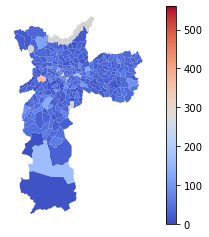

In [6]:
fig, ax = plt.subplots()
gdf.plot(ax = ax, column=f'school_count', cmap='coolwarm', vmin=0, vmax=560, legend=True, figsize=(20,20), 
          missing_kwds={'color': 'lightgrey'})

fig.patch.set_visible(False)
ax.axis('off')
fig.savefig(f'school_SP.png', format='png', dpi=600)

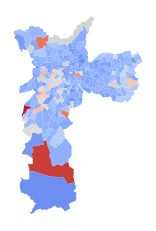

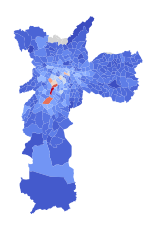

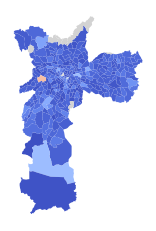

In [7]:
for c in ['home', 'work', 'school']:
    fig, ax = plt.subplots()
    gdf.plot(ax = ax, column=f'{c}_count', cmap='coolwarm', vmin=0, vmax=560, legend=False, figsize=(20,20), 
              missing_kwds={'color': 'lightgrey'})

    fig.patch.set_visible(False)
    ax.axis('off')
    fig.savefig(f'{c}_SP.png', format='png', dpi=600)

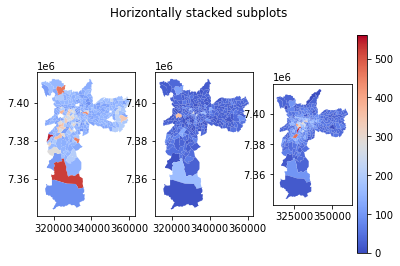

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Horizontally stacked subplots')
gdf.plot(ax = ax1, column='home_count', cmap='coolwarm', vmin=0, vmax=560, legend=False)
gdf.plot(ax = ax2, column='school_count', cmap='coolwarm', vmin=0, vmax=560, legend=False)
gdf.plot(ax = ax3, column='work_count', cmap='coolwarm', vmin=0, vmax=560, legend=True)

In [9]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

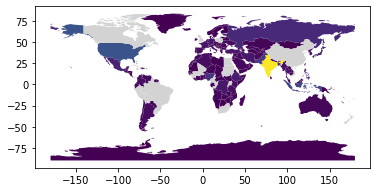

In [10]:
import numpy as np

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan

world.plot(column='pop_est', missing_kwds={'color': 'lightgrey'});


In [11]:
geopandas.__version__

'0.7.0'